In [1]:
import numpy as np
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
filename = "/home/linus/Modular_code/InputFiles/EPL_Soccer_MLR_LR.csv"

# reading the data and also checking the computation time

%time df = pd.read_csv(filename)

print(df.shape)

CPU times: user 5.28 ms, sys: 118 µs, total: 5.4 ms
Wall time: 4.88 ms
(217, 13)


In [3]:
# checking the first 5 rows and columns

df.head()

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60.0,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68.0,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21.0,21.86,104.6,55.36,177.8,69.1,19.88
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69.0,21.88,126.4,57.18,185.0,74.9,23.66
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29.0,18.96,80.3,53.20,184.6,64.6,17.64


In [4]:
# checking the last 5 rows and columns

df.tail()

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# decsribing the data

df.describe().T


,count,mean,std,min,25%,50%,75%,max
DistanceCovered(InKms),202.0,4.718614,0.457976,3.80,4.3725,4.755,5.030,6.72
Goals,202.0,7.108663,1.800549,3.30,5.9000,6.850,8.275,14.30
MinutestoGoalRatio,202.0,43.091584,3.662989,35.90,40.6000,43.500,45.575,59.70
ShotsPerGame,202.0,14.566337,1.362451,11.60,13.5000,14.700,15.575,19.20
AgentCharges,202.0,76.876238,47.501239,8.00,41.2500,65.500,97.000,234.00
BMI,202.0,22.955891,2.863933,16.75,21.0825,22.720,24.465,34.42
Cost,202.0,69.021782,32.565333,28.00,43.8500,58.600,90.350,200.80
PreviousClubCost,202.0,64.873713,13.070197,34.36,54.6675,63.035,74.750,106.00
Height,202.0,180.103960,9.734494,148.90,174.0000,179.700,186.175,209.40
Weight,202.0,75.008168,13.925574,37.80,66.5250,74.400,84.125,123.20


In [6]:
# checking if the data contains any NULL value

df.isnull().sum()

PlayerName                15
Club                      15
DistanceCovered(InKms)    15
Goals                     15
MinutestoGoalRatio        15
ShotsPerGame              15
AgentCharges              15
BMI                       15
Cost                      15
PreviousClubCost          15
Height                    15
Weight                    15
Score                     15
dtype: int64

In [7]:
df.tail(15)

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Data cleaning by dropping rows with all nulls
#dropping Null and removing categorical columns
df.dropna(axis=0, how='all', thresh=None, subset=None, inplace=True)
print(df.shape)

(202, 13)


In [9]:
df.head()

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60.0,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68.0,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21.0,21.86,104.6,55.36,177.8,69.1,19.88
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69.0,21.88,126.4,57.18,185.0,74.9,23.66
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29.0,18.96,80.3,53.20,184.6,64.6,17.64


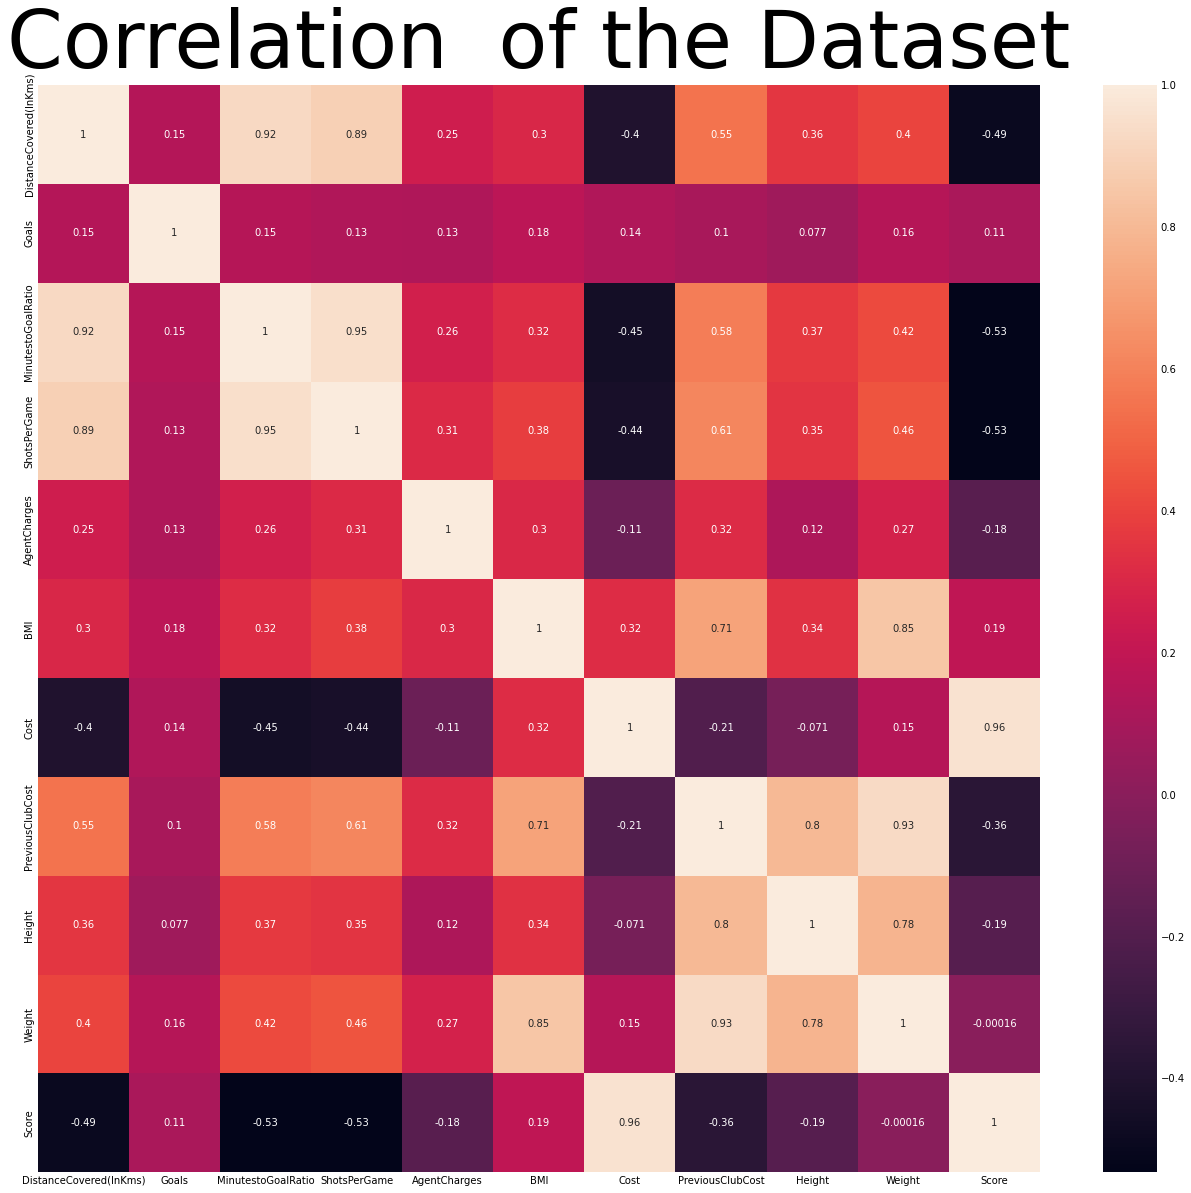

In [20]:
# plotting a correlation heatmap

plt.rcParams['figure.figsize'] = (20, 20)
sns.heatmap(df.corr(), annot = True)

plt.title('Correlation  of the Dataset', fontsize = 80)
plt.show()

In [21]:
# Find the highly correlated features
correlated_features = set()
correlation_matrix = df.corr()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        # Finding positively or negatively correlated
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print("Correlated Features : ", correlated_features)

Correlated Features :  {'MinutestoGoalRatio', 'Score', 'Weight', 'Height', 'ShotsPerGame'}


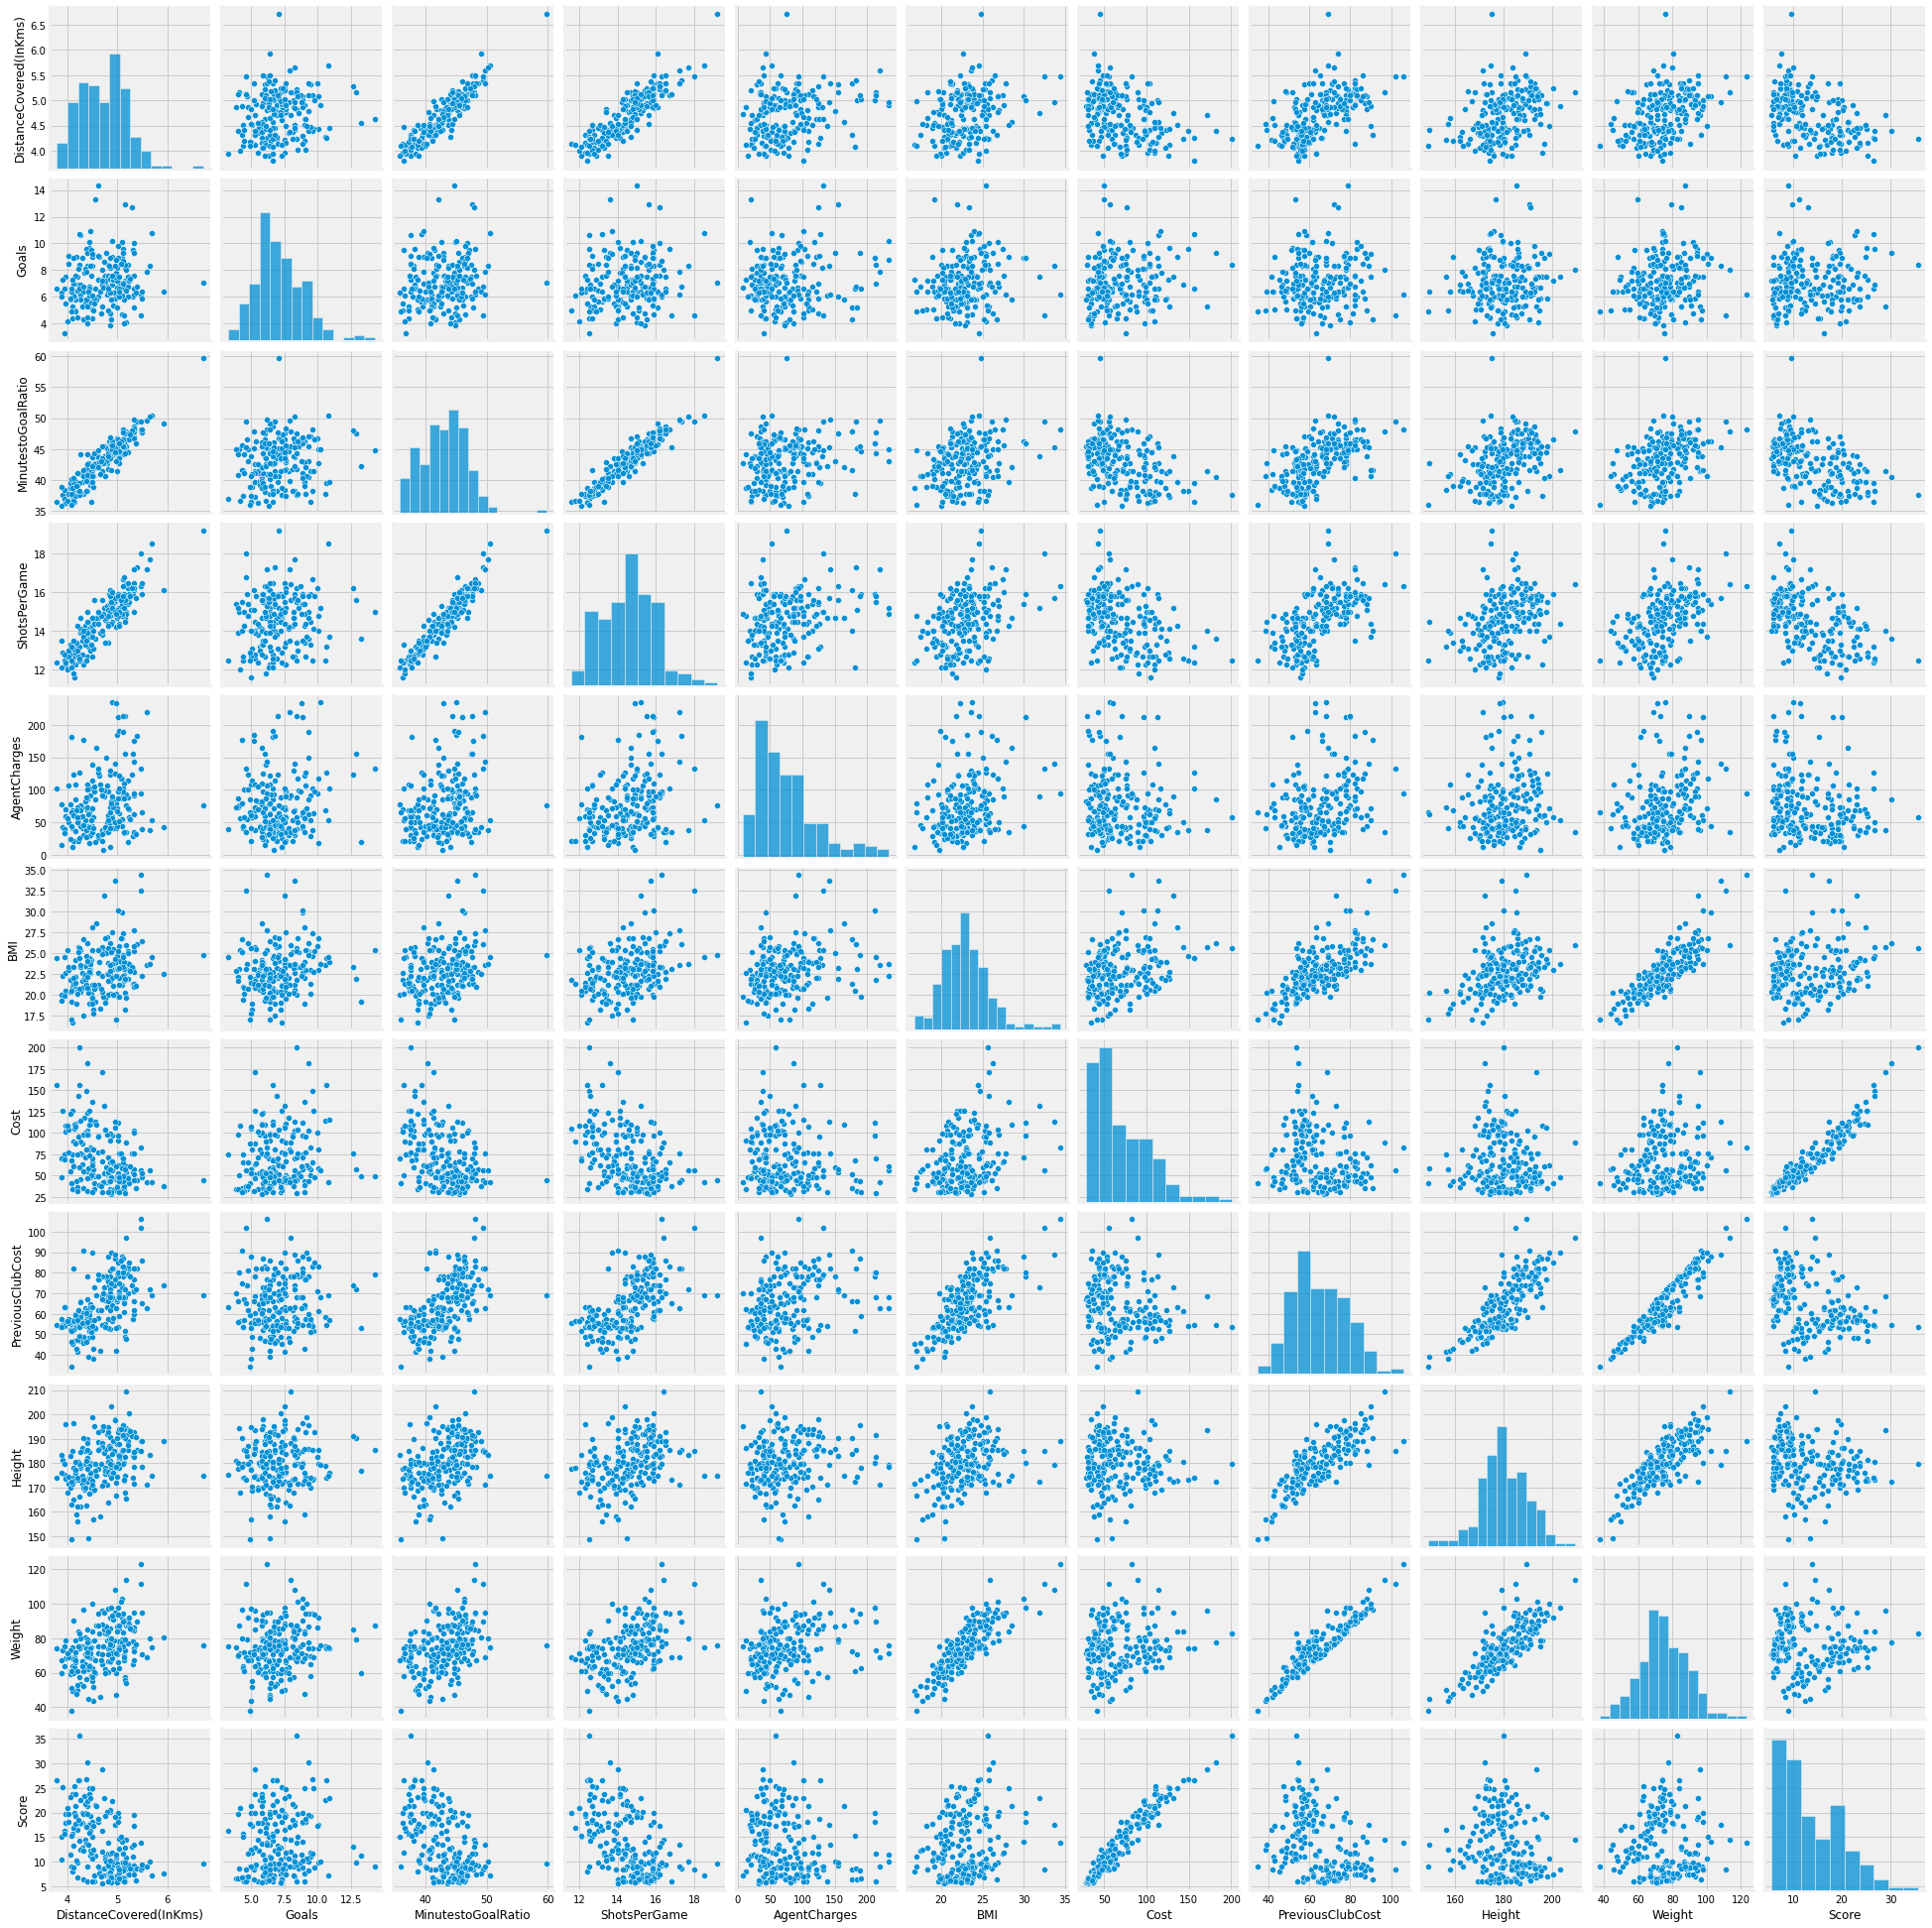

In [22]:
# Pairplot to show relationship between pair of features
sns.pairplot(df)

# Creating Regression Models from Scrach

## LinearRegression

In [23]:
class LinearRegression:
    def __init__(self, lr=0.01, n_iter=1000):
        # hyperparameters initialization
        self.lr = lr
        self.n_iter = n_iter
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # parameter initialization
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for i in range(self.n_iter):
            # prediction
            y_pred = self.predict(X)
            
            # y = Wx+b
            
            # compute gradients
            dW = np.dot(X.T, (y_pred - y)) / n_samples
            db = np.sum(y_pred - y) / n_samples
            
            # update parameters
            self.weights -= self.lr * dW
            self.bias -= self.lr * db
        
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

## RidgeRegression

In [24]:
class RidgeRegression:
    def __init__(self, alpha =1, lr=0.01, n_iter=1000):
        # hyperparameters initialization
        self.alpha = alpha
        self.lr = lr
        self.n_iter = n_iter
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # parameter initialization
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iter):
            # prediction
            y_pred = self.predict(X)
            
            #cost = MSE + alpha*W**2
            
            # compute gradients
            dW = (-(2*np.dot(X.T,(y-y_pred)))+(2*self.alpha*self.weights)) / n_samples
            db = -2*np.sum(y_pred - y) / n_samples
            
            # update parameters
            self.weights -= self.lr * dW
            self.bias -= self.lr * db
        
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

## LassoRegression

In [25]:
class LassoRegression:
    def __init__(self, alpha =1, lr=0.01, n_iter=1000):
        # hyperparameters initialization
        self.alpha = alpha
        self.lr = lr
        self.n_iter = n_iter
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # parameter initialization
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # cost = MSE + alpha*|W|
        
        for _ in range(self.n_iter):
            # prediction
            y_pred = self.predict(X)
            
            # compute gradients
            dW = (-(2*np.dot(X.T,(y-y_pred)))+(self.alpha)) / n_samples
            db = -2*np.sum(y_pred - y) / n_samples
            
            # update parameters
            self.weights -= self.lr * dW
            self.bias -= self.lr * db
        
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Data Preprocessing

In [27]:
#dropping Null and removing categorical columns
df.dropna(axis=0, how='all', thresh=None, subset=None, inplace=True)
new_df = df.select_dtypes(['number'])

In [28]:
# Finding correlated features
X = new_df.iloc[:,:-1] # independent features
y = new_df.iloc[:,-1] # dependent feature

print("shape of X : ", X.shape)

correlated_features = set()
correlation_matrix = X.corr()
correlation_matrix

shape of X :  (202, 10)


,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000


In [29]:
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8: #positively or negatively correlated
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            
print("Correlated Features : ", correlated_features)

Correlated Features :  {'Weight', 'ShotsPerGame', 'MinutestoGoalRatio', 'Height'}


In [30]:
# Dropping Correlated features from X
X.drop(columns=correlated_features, axis=1, inplace=True)
print("Shape of X after dropping correlated features : ", X.shape)

Shape of X after dropping correlated features :  (202, 6)


/home/linus/.local/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Train and Test Split

In [31]:
# Creating Train and Test data

def shuffle_data(X, y, seed=None):
    """ Random shuffle of the samples in X and y """
    if seed:
        np.random.seed(seed)
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    try:
        return X[idx], y[idx]
    except:
        return X.iloc[idx], y.iloc[idx]
    

def train_test_split(X, y, test_size=0.5, shuffle=True, seed=None):
    """ Split the data into train and test sets """
    if shuffle:
        X, y = shuffle_data(X, y, seed)
    # Split the training data from test data in the ratio specified in test_size
    split_i = len(y) - int(len(y) // (1 / test_size))
    X_train, X_test = X[:split_i], X[split_i:]
    y_train, y_test = y[:split_i], y[split_i:]

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, seed=42)

# Model Creation
### _*Linear Model*_

In [32]:
linear_model = LinearRegression(lr=.00001, n_iter=100)
linear_model.fit(X_train, y_train)
linear_predict = linear_model.predict(X_test)

### _*Lasso Model*_

In [33]:
lasso_model = LassoRegression(alpha=0.03, lr=.00001, n_iter=100)
lasso_model.fit(X_train, y_train)
lasso_predict = lasso_model.predict(X_test)

### _*Ridge Model*_

In [34]:
ridge_model = RidgeRegression(alpha=0.03, lr=.00001, n_iter=100)
ridge_model.fit(X_train, y_train)
ridge_predict = ridge_model.predict(X_test)

# Metrics

In [35]:
# MSE

def mean_squared_error(y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)
    
# R2 score
def r2_score(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    print(corr_matrix)
    corr = corr_matrix[0, 1]
    return corr ** 2

In [46]:
print("MSE of Linear Model : ", mean_squared_error(y_test, linear_predict))
print("MSE of Lasso Model : ", mean_squared_error(y_test, lasso_predict))
print("MSE of Ridge Model : ", mean_squared_error(y_test, ridge_predict))
print('****************************************************************\n')
print("R2 Score of Linear Model : ", r2_score(y_test, linear_predict),'\n')
print("R2 Score of Lasso Model : ", r2_score(y_test, lasso_predict),'\n')
print("R2 Score of Ridge Model : ", r2_score(y_test, ridge_predict),'\n')

MSE of Linear Model :  4.288101722760345
MSE of Lasso Model :  2.849692797681987
MSE of Ridge Model :  2.849694826129537
****************************************************************

[[1.         0.96521229]
 [0.96521229 1.        ]]
R2 Score of Linear Model :  0.931634769338225 

[[1.         0.97366924]
 [0.97366924 1.        ]]
R2 Score of Lasso Model :  0.9480317900859894 

[[1.         0.97366923]
 [0.97366923 1.        ]]
R2 Score of Ridge Model :  0.9480317788420334 



## Regression Decision Tree

In [47]:
class NodeRegression():
    """
    Class to grow a regression decision tree
    """
    def __init__(
        self, 
        Y: list,
        X: pd.DataFrame,
        min_samples_split=None,
        max_depth=None,
        depth=None,
        node_type=None,
        rule=None
    ):
        # Saving the data to the node 
        self.Y = Y 
        self.X = X

        # Saving the hyper parameters
        self.min_samples_split = min_samples_split if min_samples_split else 20
        self.max_depth = max_depth if max_depth else 5

        # Default current depth of node 
        self.depth = depth if depth else 0

        # Extracting all the features
        self.features = list(self.X.columns)

        # Type of node 
        self.node_type = node_type if node_type else 'root'

        # Rule for spliting 
        self.rule = rule if rule else "" #which feature is used for splitting

        # Getting the mean of Y 
        self.ymean = np.mean(Y)

        # Getting the residuals 
        self.residuals = self.Y - self.ymean

        # Calculating the mse of the node 
        self.mse = self.get_mse(Y, self.ymean)

        # Saving the number of observations in the node 
        self.n = len(Y)

        # Initiating the left and right nodes as empty nodes
        self.left = None 
        self.right = None 

        # Default values for splits
        self.best_feature = None 
        self.best_value = None 

        
    def get_mse(self, y_true, y_pred) -> float:
        """
        Method to calculate the mean squared error 
        """
        return np.mean((y_true - y_pred) ** 2)
    
    # X = [1,2,3,4]
    # window  = 2
    #out = [1.5,2.5,3.5]

    def ma(self, x: np.array, window: int) -> np.array:
        """
        Calculates the moving average of the given list. 
        """
        return np.convolve(x, np.ones(window), 'valid') / window

    def best_split(self) -> tuple:
        """
        Given the X features and Y targets calculates the best split 
        for a decision tree
        """
        # Creating a dataset for spliting
        df = self.X.copy()
        df['Y'] = self.Y

        # Getting the GINI impurity for the base input 
        mse_base = self.mse

        # Finding which split yields the best GINI gain 
        #max_gain = 0

        # Default best feature and split
        best_feature = None
        best_value = None

        for feature in self.features:
            # Droping missing values
            Xdf = df.dropna().sort_values(feature)

            # Sorting the values and getting the rolling average
            xmeans = self.ma(Xdf[feature].unique(), 2)

            for value in xmeans:
                # Getting the left and right ys 
                left_y = Xdf[Xdf[feature]<value]['Y'].values
                right_y = Xdf[Xdf[feature]>=value]['Y'].values

                # Getting the means 
                left_mean = np.mean(left_y)
                right_mean = np.mean(right_y)

                # Getting the left and right residuals 
                res_left = left_y - left_mean 
                res_right = right_y - right_mean

                # Concatenating the residuals 
                r = np.concatenate((res_left, res_right), axis=None)

                # Calculating the mse 
                n = len(r)
                r = r ** 2
                r = np.sum(r)
                mse_split = r / n

                # Checking if this is the best split so far 
                if mse_split < mse_base:
                    best_feature = feature
                    best_value = value 

                    # Setting the best gain to the current one 
                    mse_base = mse_split

        return (best_feature, best_value)
    
    
    # Growing tree recursively
    def grow_tree(self):
        """
        Recursive method to create the decision tree
        """
        # Making a df from the data 
        df = self.X.copy()
        df['Y'] = self.Y

        # If there is GINI to be gained, we split further 
        if (self.depth < self.max_depth) and (self.n >= self.min_samples_split):

            # Getting the best split 
            best_feature, best_value = self.best_split()

            if best_feature is not None:
                # Saving the best split to the current node 
                self.best_feature = best_feature
                self.best_value = best_value

                # Getting the left and right nodes
                left_df, right_df = df[df[best_feature]<=best_value].copy(), df[df[best_feature]>best_value].copy()

                # Creating the left and right nodes
                left = NodeRegression(
                    left_df['Y'].values.tolist(), 
                    left_df[self.features], 
                    depth=self.depth + 1, 
                    max_depth=self.max_depth, 
                    min_samples_split=self.min_samples_split, 
                    node_type='left_node',
                    rule=f"{best_feature} <= {round(best_value, 3)}"
                    )

                self.left = left 
                self.left.grow_tree()

                right = NodeRegression(
                    right_df['Y'].values.tolist(), 
                    right_df[self.features], 
                    depth=self.depth + 1, 
                    max_depth=self.max_depth, 
                    min_samples_split=self.min_samples_split,
                    node_type='right_node',
                    rule=f"{best_feature} > {round(best_value, 3)}"
                    )

                self.right = right
                self.right.grow_tree()

    def print_info(self, width=4):
        """
        Method to print the infromation about the tree
        """
        # Defining the number of spaces 
        const = int(self.depth * width ** 1.5)
        spaces = "-" * const
        
        if self.node_type == 'root':
            print("Root")
        else:
            print(f"|{spaces} Split rule: {self.rule}")
        print(f"{' ' * const}   | MSE of the node: {round(self.mse, 2)}")
        print(f"{' ' * const}   | Count of observations in node: {self.n}")
        print(f"{' ' * const}   | Prediction of node: {round(self.ymean, 3)}")   

    
    # Displaying the tree structure
    def print_tree(self):
        """
        Prints the whole tree from the current node to the bottom
        """
        self.print_info() 
        
        if self.left is not None: 
            self.left.print_tree()
        
        if self.right is not None:
            self.right.print_tree()



In [49]:
# Creation of root node
root = NodeRegression(y_train, X_train, max_depth=2, min_samples_split=3)
root

In [50]:
# growing the tree recursively
root.grow_tree()

In [51]:
# Printing tree 
root.print_tree()

Root
   | MSE of the node: 35.87
   | Count of observations in node: 162
   | Prediction of node: 13.587
|-------- Split rule: Cost <= 68.05
           | MSE of the node: 5.33
           | Count of observations in node: 93
           | Prediction of node: 9.187
|---------------- Split rule: Cost <= 44.65
                   | MSE of the node: 1.8
                   | Count of observations in node: 44
                   | Prediction of node: 7.431
|---------------- Split rule: Cost > 44.65
                   | MSE of the node: 3.24
                   | Count of observations in node: 49
                   | Prediction of node: 10.764
|-------- Split rule: Cost > 68.05
           | MSE of the node: 15.78
           | Count of observations in node: 69
           | Prediction of node: 19.516
|---------------- Split rule: Cost <= 109.3
                   | MSE of the node: 6.13
                   | Count of observations in node: 50
                   | Prediction of node: 17.8
|--------------

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
#X, y = load_diabetes(return_X_y=True)
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, X, y, cv=5)

array([0.46196735, 0.74246175, 0.87827764, 0.73471287, 0.82410885])

In [55]:
print("Accuracy of model : ", np.mean(cross_val_score(regressor, X, y, cv=5)))

Accuracy of model :  0.7283056928182269


In [56]:
fil_df = new_df[new_df["Cost"]<=44.65]

print(fil_df.shape)
np.mean(fil_df["Score"])

(54, 11)


7.292777777777778

# Dumping Models

In [61]:
import pickle as pkl
#Saving model in Output Folder
model_save_path = '/home/linus/Modular_code/models/'
pkl.dump(linear_model, open(model_save_path+"linear_model.pkl", "wb"))

In [62]:
import pickle as pkl
#Saving model in Output Folder
model_save_path = '/home/linus/Modular_code/models/'
pkl.dump(lasso_model, open(model_save_path+"lasso_model.pkl", "wb"))

In [63]:
import pickle as pkl
#Saving model in Output Folder
model_save_path = '/home/linus/Modular_code/models/'
pkl.dump(ridge_model, open(model_save_path+"ridge_model.pkl", "wb"))

In [65]:
import pickle as pkl
#Saving model in Output Folder
model_save_path = '/home/linus/Modular_code/models/'
pkl.dump(root, open(model_save_path+"root_node_regression.pkl", "wb"))